In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df = df.drop(['Car_Name'], axis=1)

In [5]:
label_encoders = {}
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [7]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Architecture 1

In [10]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # No activation for regression
custom_optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=custom_optimizer, loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 53.1632 - mae: 4.4879 - val_loss: 35.0309 - val_mae: 4.4210
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 31.2765 - mae: 3.6356 - val_loss: 22.9818 - val_mae: 3.6182
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 25.1046 - mae: 3.0185 - val_loss: 10.0244 - val_mae: 2.3397
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.2124 - mae: 2.0718 - val_loss: 3.4124 - val_mae: 1.4901
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9123 - mae: 1.6770 - val_loss: 3.1537 - val_mae: 1.2583
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8152 - mae: 1.5802 - val_loss: 2.3897 - val_mae: 1.2527
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9562 - mae: 1.3681 - val_loss: 2.1816 - val_mae: 1.2573
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.6448 - mae: 1.2180 - val_loss: 1.9013 - val_mae: 1.0757
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7924 

In [16]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [17]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.5631 - mae: 0.5164 
Test MAE: 0.52
R2 Score: 0.9761556361867939


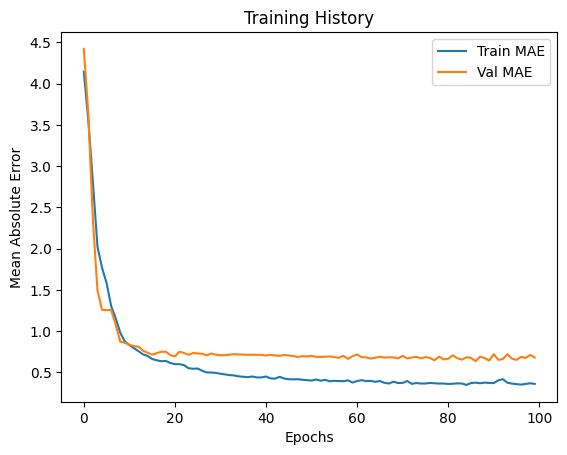

In [18]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

Architecture 2

In [31]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
custom_optimizer = Adam(learning_rate=0.01)
model2.compile(optimizer=custom_optimizer, loss='mse', metrics=['mae'])
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 45.8165 - mae: 4.3669 - val_loss: 33.7327 - val_mae: 4.3149
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 33.0021 - mae: 3.5668 - val_loss: 7.6117 - val_mae: 2.4144
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 15.2410 - mae: 2.8971 - val_loss: 6.8513 - val_mae: 2.0738
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.8101 - mae: 1.9305 - val_loss: 5.7397 - val_mae: 1.6658
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 6.5721 - mae: 1.5596 - val_loss: 6.7100 - val_mae: 1.8455
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.3973 - mae: 1.3986 - val_loss: 2.3986 - val_mae: 1.0831
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2.4807 - mae: 1.0208 - val_loss: 3.1401 - val_mae: 1.3048
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3.7743 - mae: 1.1100 - val_loss: 3.6245 - val_mae: 1.2748
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.4603 - mae: 1.01

In [33]:
y_pred = model2.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [34]:
loss, mae = model2.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5638 - mae: 0.5168
Test MAE: 0.52
R2 Score: 0.9756903478153153


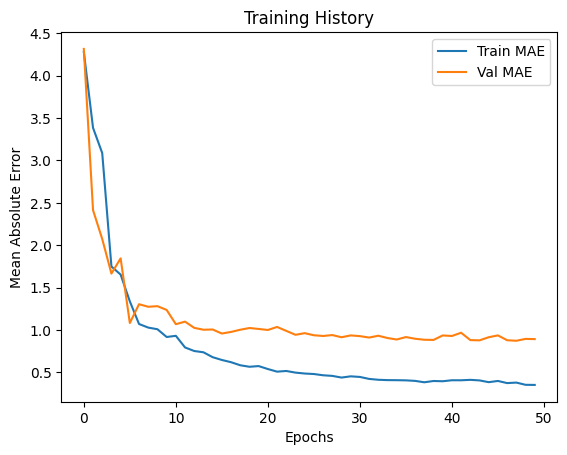

In [35]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [39]:
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])
custom_optimizer = Adam(learning_rate=0.05)
model3.compile(optimizer=custom_optimizer, loss='mse', metrics=['mae'])
model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model3.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 45.6367 - mae: 4.0778 - val_loss: 4.6065 - val_mae: 1.5784
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.8840 - mae: 1.4456 - val_loss: 5.8772 - val_mae: 1.7619
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.3932 - mae: 1.4180 - val_loss: 3.0214 - val_mae: 1.2613
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 5.9125 - mae: 1.3878 - val_loss: 8.5423 - val_mae: 2.0179
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.6995 - mae: 1.6408 - val_loss: 2.7760 - val_mae: 1.0141
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.6819 - mae: 1.1004 - val_loss: 4.7320 - val_mae: 1.2275
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.3818 - mae: 1.1654 - val_loss: 5.1327 - val_mae: 1.2608
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.0832 - mae: 0.9474 - val_loss: 3.5154 - val_mae: 1.1263
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.0060 - mae

In [42]:
y_pred = model3.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [43]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5122 - mae: 0.5192
Test MAE: 0.55
R2 Score: 0.9781509758014812


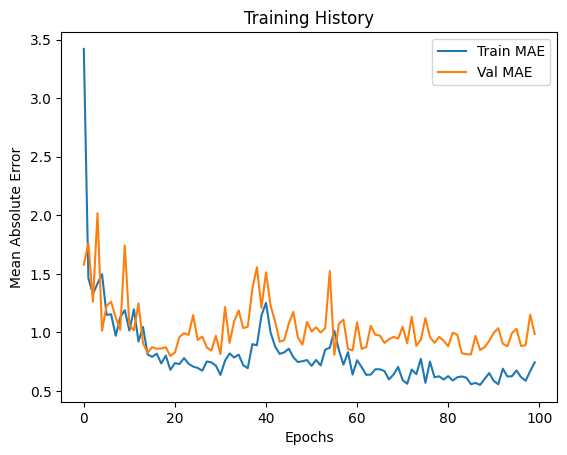

In [44]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [49]:
model4 = Sequential([
    Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
custom_optimizer = Adam(learning_rate=0.0001)
model4.compile(optimizer=custom_optimizer, loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
history = model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 46.6374 - mae: 4.3917 - val_loss: 45.7359 - val_mae: 4.9996
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 36.1067 - mae: 4.0715 - val_loss: 44.8219 - val_mae: 4.9454
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 39.3891 - mae: 4.0212 - val_loss: 43.8567 - val_mae: 4.8892
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.0659 - mae: 3.9981 - val_loss: 42.8622 - val_mae: 4.8316
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.8904 - mae: 4.1471 - val_loss: 41.8343 - val_mae: 4.7719
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.9609 - mae: 4.0140 - val_loss: 40.7894 - val_mae: 4.7114
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 45.7301 - mae: 4.0329 - val_loss: 39.6800 - val_mae: 4.6474
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 38.3870 - mae: 3.9136 - val_loss: 38.5134 - val_mae: 4.5782
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss

In [51]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [52]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.5122 - mae: 0.5192 
Test MAE: 0.55
R2 Score: 0.9751556236333975


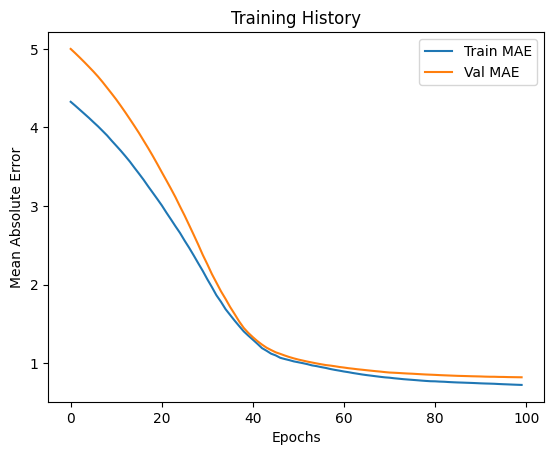

In [53]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()